In [1]:
from pygam import LogisticGAM, s, f, l
from datasets import load_titanic
from tools import *
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, plot_roc_curve

In [2]:
df, df_train, df_test = load_titanic()
df_train.columns

Index(['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'target'], dtype='object')

In [3]:
original_X = df.drop(['target'], axis=1)
original_y = df['target']
train_X = df_train.drop(['target'], axis=1)
train_y = df_train['target']
test_X = df_test.drop(['target'], axis=1)
test_y = df_test['target']

In [4]:
original_X = pd.get_dummies(original_X)
train_X = pd.get_dummies(train_X)
test_X = pd.get_dummies(test_X)

features = train_X.columns

In [6]:
len(train_X.columns)

10

## Spline terms

In [7]:
selected_features = ['pclass', 'age', 'sibsp', 'sex_male', 'embarked_S']

In [8]:
model = LogisticGAM(s(0) + s(1) + s(2) + s(3) + s(4))
model._estimator_type = "classifier"
model.classes_ = np.array([False, True])
# model.fit(train_X, train_y)
model.gridsearch(train_X[selected_features].values, train_y.values)
model.score = model.accuracy

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


In [9]:
train_X

,pclass,age,sibsp,parch,fare,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
177,3,28.0,3,1,25.4667,0,1,0,0,1
31,1,40.0,0,0,27.7208,0,1,1,0,0
823,1,38.0,0,0,0.0000,0,1,0,0,1
838,3,28.0,0,0,8.0500,0,1,0,0,1
122,3,28.0,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
181,3,28.0,8,2,69.5500,1,0,0,0,1
216,1,31.0,1,0,113.2750,1,0,1,0,0
707,2,45.0,0,0,13.5000,1,0,0,0,1
668,3,28.0,0,0,7.7750,0,1,0,0,1


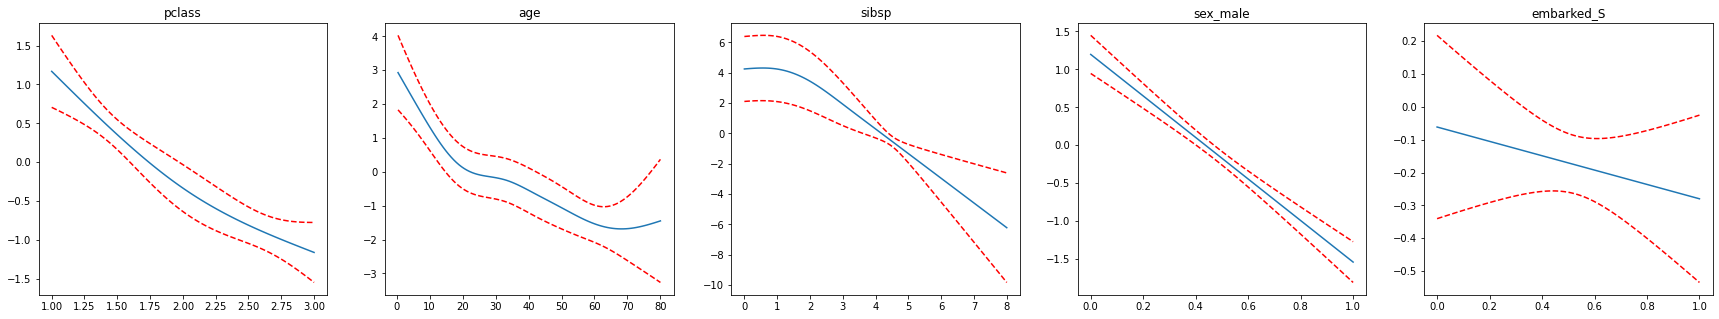

In [10]:
# relationship between each variable and output variable (survived)
# holding all fixed we can see how it change chance to survive
fig, axs = plt.subplots(1, len(train_X[selected_features].columns), figsize=(30,5))
titles = train_X[selected_features].columns

for i, ax in enumerate(axs):
    XX = model.generate_X_grid(term=i)
    pdep, confi = model.partial_dependence(term=i, width=.96)

    ax.plot(XX[:, i], pdep)
    ax.plot(XX[:, i], confi, c='r', ls='--')
    ax.set_title(titles[i])

In [35]:
model_performance(model, train_X[selected_features], train_y, test_X[selected_features], test_y)

Train score
0.8154093097913323
Test score
0.8022388059701493


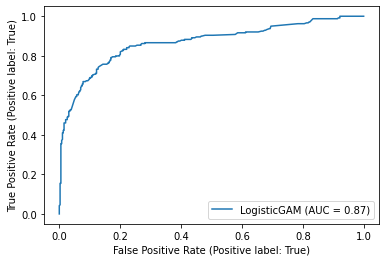

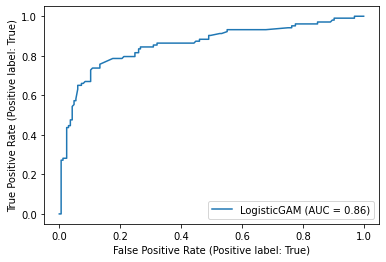

In [24]:
plot_roc_curve(model, train_X[selected_features], train_y)
plot_roc_curve(model, test_X[selected_features], test_y)

In [24]:
confusion_matrix(model.predict(train_X[selected_features]), train_y, model.predict(test_X[selected_features]), test_y)

Train
TN: 96, TP: 47, FN: 21, FP: 14
Test
TN: 385, TP: 190, FN: 84, FP: 54
